<a href="https://colab.research.google.com/github/sua11111/AI_06_project_sua/blob/main/AI_06_%EC%8B%A0%EC%88%98%EC%95%84_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###파일 불러오기

In [1]:
from google.colab import files
uploaded = files.upload()
#21분 정도 ..ㅎ

Saving click.csv to click.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

###설치

In [2]:
%%capture

# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

#웹 광고 클릭 예측(CTR) 모델링
####CTR (Click Through Rate) : 
전체 페이지 뷰 횟수 대비 특정 광고를 클릭한 횟수 비율

####CTR 예측 :
사용자가 현재 보고 있는 웹 페이지에 노출된 광고를 클릭 하는지를 예측하는 이진 분류 문제


####Click data :
10일 간의 CTR 관련 데이터



#데이터 필드 구성


1. click (= target)

   사용자의 광고 클릭 여부

2. banner pos 

   배너의 위치

3. device model
   
   기기 타입

4. app category
   
   사용자가 광고를 클릭한 앱, 웹의 카테고리




##Click data
300만개의 관측치 중 8만개의 데이터로 모델링

학습용 데이터로 6만개

테스트용 데이터로 1만개

검증용 데이터로 1만개 관측치를 사용하여 모델링

\\
 ❗ 300만개의 관측치 중 8만개의 관측치만 선택한 이유 ?

#분석 가설

###온라인 내의 광고 배너의 위치가 상단, 사용자의 앱 또는 웹의 카테고리 단순한 여가활동과 관련된 카테고리 일 수록 사용자의 광고 클릭 여부가 증가할 것이다

#Target Click 변수
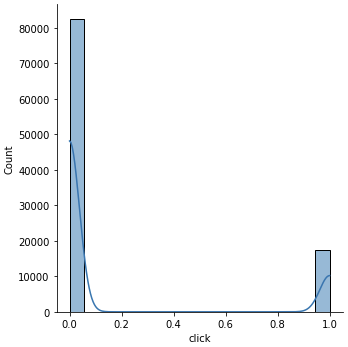

# 머신러닝 적용
   ### 의사결정트리 (Decision Tree)
   ### 랜덤포레스트 (Random Forest)
   ### 로지스틱 (Logistic)
   ### XGBoost


#의사결정트리 (Decision Tree) ROC
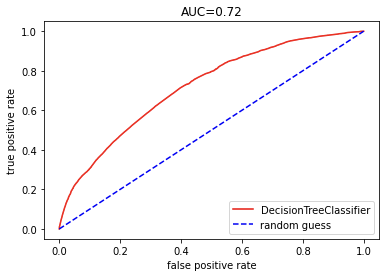

#랜덤포레스트 (Random Forest)
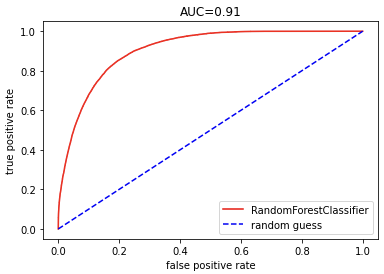

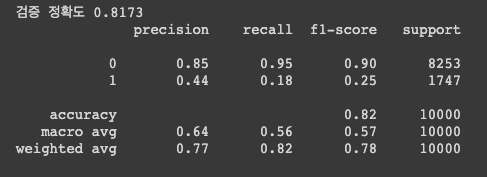

#로지스틱 (Logistic)
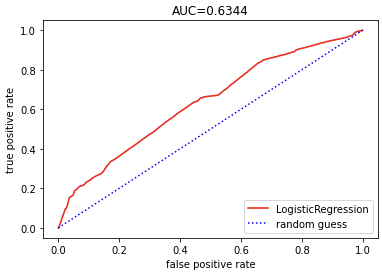

#XGBoost

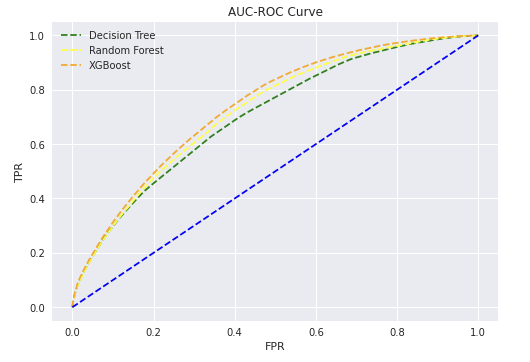

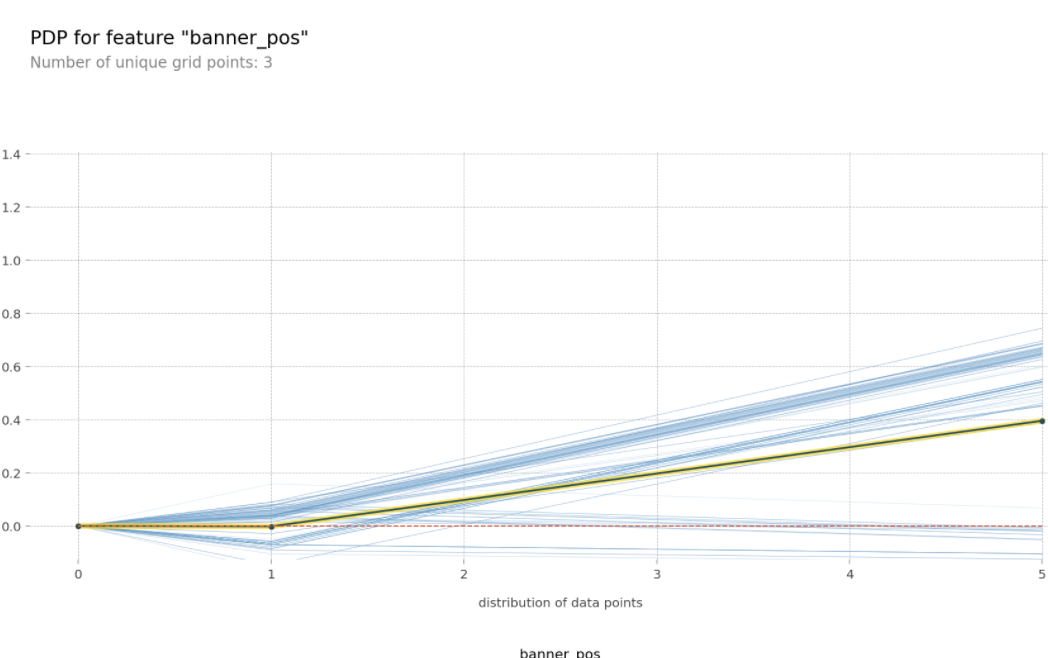

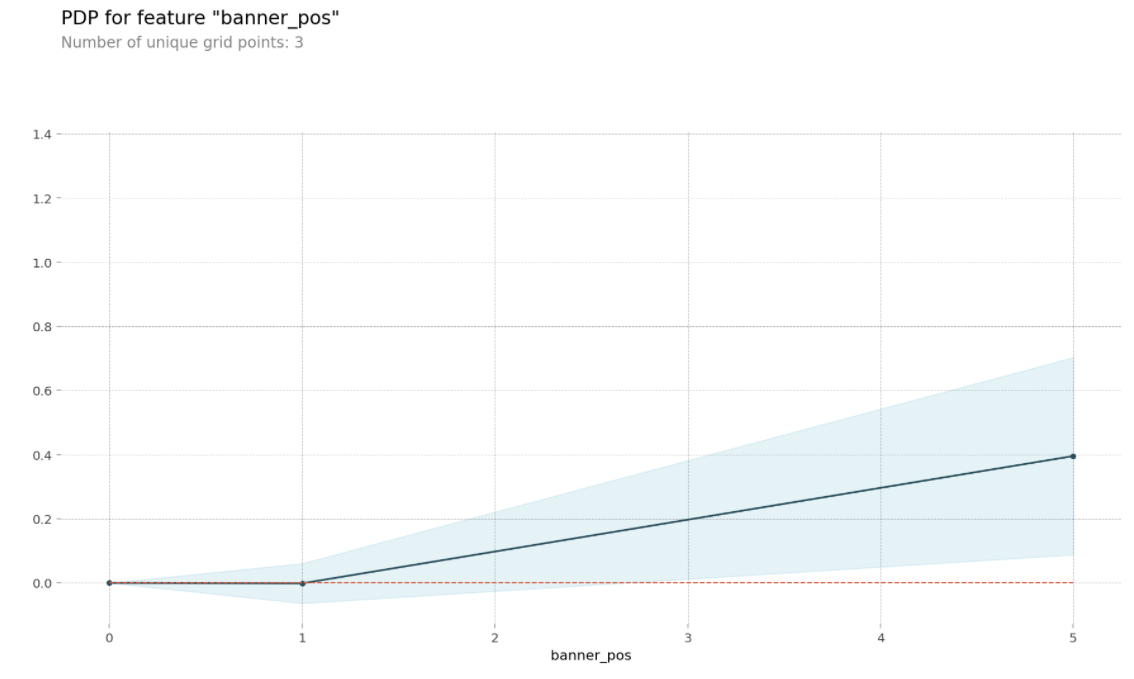

광고 배너 위치가 하단에서(x축0) 상단(x축1)로 갈 때 사용자가 광고를 클릭(target) 하게 될 확률이 0.7 증가

-end-

###의사결정트리

In [4]:
df = pd.read_csv("/content/click.csv", nrows=80000)
#50만개 중에서 8만개

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [6]:
unused_columns = ['Unnamed: 0', 'id', 'hour', 'site_id',
       'site_domain', 'app_id', 'app_domain',
       'device_id', 'device_ip', 'device_type',
       'device_conn_type']

In [51]:
#label_column = "click"

In [7]:
df = df.drop(unused_columns, axis=1)

In [8]:
target = 'click'
features = df.columns.drop('click')

In [9]:
# 마지막 10,000 대출은 테스트셋
# 테스트셋 전 10,000 대출이 검증셋
# 나머지는 학습셋
test = df[-10000:]
val = df[-20000:-10000]
train = df[:-20000]

In [10]:
test.shape, val.shape, train.shape

((10000, 14), (10000, 14), (60000, 14))

In [11]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [13]:
#X_dict_train = list(X_train.T.to_dict().values())
#X_dict_train[0]

{'C1': 1005,
 'C14': 15706,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': -1,
 'C21': 79,
 'app_category': '07d7df22',
 'app_domain': '7801e8d9',
 'app_id': 'ecad2386',
 'banner_pos': 0,
 'device_conn_type': 2,
 'device_model': '44956a24',
 'device_type': 1,
 'site_category': '28905ebd',
 'site_domain': 'f3845767',
 'site_id': '1fbe01fe'}

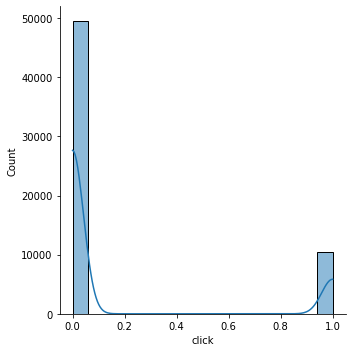

In [12]:
# 타겟값인 click 분포
%matplotlib inline
import seaborn as sns

sns.displot(y_train, kde=True);

In [21]:
#sns.displot(X_test, kde=True);

In [18]:
X_dict_test = list(X_test.T.to_dict().values())

AttributeError: ignored

In [ ]:
#y_test = test_df[label_column]

In [15]:
# 원핫인코딩
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=True)
# 메모리 오류나 꼭 넣기.. 

X_train = vectorizer.fit_transform(X_dict_train)
X_train.shape

(80000, 4635)

In [14]:
X_train.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [16]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [17]:
X_test = vectorizer.fit_transform(X_dict_test)
X_test.shape

(10000, 2200)

In [129]:
from sklearn.tree import DecisionTreeClassifier

parameters = {"max_depth": [3, 10, None]}
decision_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)

In [130]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring="roc_auc")

In [131]:
# 오래 걸령
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 10, None]}, pre_dispatch='2*n_jobs',


In [132]:
grid_search.best_params_

{'max_depth': 10}

In [133]:
decision_tree_best = grid_search.best_estimator_

In [20]:
# 시행하지 않음
# 시행하지 않음
# 시행하지 않음
from sklearn.tree import export_graphviz

export_graphviz(decision_tree_best, out_file="ctr_decision_tree.dot", 
                feature_names=vectorizer.feature_names_,
                class_names=["0", "1"], rounded=True, filled=True, impurity=True)

In [21]:
# 시행하지 않음
# 시행하지 않음
# 시행하지 않음

import pydot

graph = pydot.graph_from_dot_file("ctr_decision_tree.dot")[0]

graph.write_png("ctr_decision_tree.png")

In [134]:
y_pred = decision_tree_best.predict(X_test)
y_pred

ValueError: ignored

In [37]:
np.unique(y_pred, return_counts=True)

(array([0]), array([100000]))

In [38]:
from sklearn.metrics import accuracy_score
# 정확도
accuracy_score(y_test, y_pred)

0.8251

In [39]:
from sklearn.metrics import confusion_matrix
# 혼동행렬
confusion_matrix(y_test, y_pred)

array([[82510,     0],
       [17490,     0]])

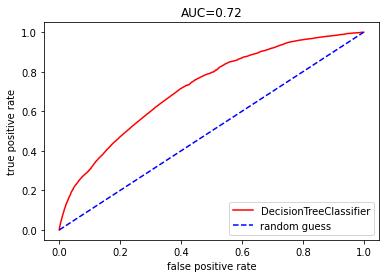

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
y_pred_proba
# 클릭을 할 확률과 하지 않을 확률 중 클릭할 확률만 추출

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#ROC 커브 계산
auc = roc_auc_score(y_test, y_pred_proba)
#ROC 커브의 AUC 계산

# ROC 커브 시각화
plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");

In [ ]:
72%의 확률이 나온거다 ?

##앙상블 기법 활용

In [39]:
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

#오래 걸령
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8173


In [44]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
# 어래 걸령
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.8173
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8253
           1       0.44      0.18      0.25      1747

    accuracy                           0.82     10000
   macro avg       0.64      0.56      0.57     10000
weighted avg       0.77      0.82      0.78     10000



In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion="gini",
                                       min_samples_split=30)

In [41]:
parameters = {"max_depth": [None]}

In [42]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=3, scoring="roc_auc")

In [43]:
#오래걸려 4분 52초
grid_search.fit(X_train, y_train)

ValueError: ignored

In [138]:
grid_search.best_params_

AttributeError: ignored

In [83]:
random_forest_best = grid_search.best_estimator_

In [84]:
y_pred = random_forest_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
accuracy_score(y_test, y_pred)

0.85652

In [86]:
confusion_matrix(y_test, y_pred)

array([[81528,   982],
       [13366,  4124]])

In [87]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1] # 클릭 할 확률
y_pred_proba

array([0.29184558, 0.11124951, 0.31819098, ..., 0.37986231, 0.18200766,
       0.18248386])

In [88]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # _ -> thressholds 임계값

auc = roc_auc_score(y_test, y_pred_proba)

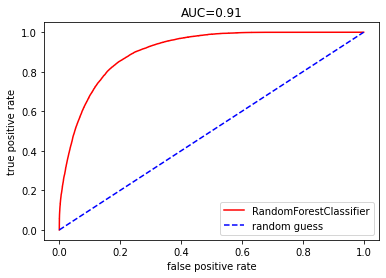

In [89]:
plt.plot(fpr, tpr, "r-", label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");

In [ ]:
# 전보다 1에 가까워짐 성능이 더 좋아졌다

###로지스틱

In [63]:
# 데이터 불러오기
train_df = pd.read_csv("/content/train (1).csv", nrows=100000)

# 불필요한 컬럼 제거
unused_cols = ["id", "hour", "device_id", "device_ip"]
label_col = "click"

train_df = train_df.drop(unused_cols, axis=1)

# 데이터 프레임 딕셔너리 형태로 변환 train
X_dict_train = list(train_df.drop(label_col, axis=1).T.to_dict().values())
y_train = train_df[label_col]

In [64]:
test_df = pd.read_csv("/content/train (1).csv", header=0, skiprows=(1, 100000), nrows=100000)
test_df = test_df.drop(unused_cols, axis=1)

# 데이터 프레임 딕셔너리 형태로 변환 test
X_dict_test = list(test_df.drop(label_col, axis=1).T.to_dict().values())
y_test = test_df[label_col]

In [65]:
# 원핫인코딩
from sklearn.feature_extraction import DictVectorizer 

vectorizer = DictVectorizer(sparse=True)
# 그리드 서치 이용시 메모리 오류 발생 발지 위해 반드시 sparse 매트릭스 사용


X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.transform(X_dict_test)
# train 경우 xtrain에 대해서 모델을 적용해서 transform 을 해야해

In [66]:
from sklearn.linear_model.logistic import LogisticRegression

clf = LogisticRegression()
#이진 분류기

clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [68]:
# 하이퍼 파라미터
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [69]:
# 예측기 받아서 clf best 로 예측하기
clf_best = grid_search.best_estimator_

In [90]:
y_pred = clf_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([98492,  1508]))

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# 정확도 실측값(관측값) 예측값 순으로
accuracy_score(y_test, y_pred)
# 82퍼센트 정도 되는 예측률이 나옴

0.82374

In [93]:
confusion_matrix(y_test, y_pred)

array([[81688,   822],
       [16804,   686]])

In [94]:
y_pred_proba = clf_best.predict_proba(X_test)[:,1] 
y_pred_proba

array([0.15268886, 0.15268633, 0.15266433, ..., 0.18103635, 0.17930623,
       0.10460121])

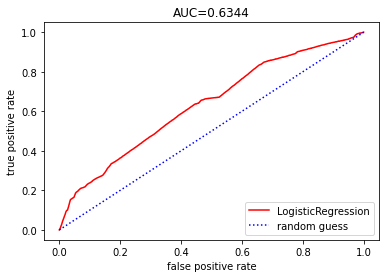

In [98]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr, tpr, "r-", label="LogisticRegression")
plt.plot([0, 1], [0, 1], "b:", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.title("AUC={:.4f}".format(auc))
plt.legend(loc="lower right")

In [ ]:
# 밑 면적이 63
# 63%
#분류기로서의 성능을 auc 지표로 알 수 있음

###그래디언트 부스팅

In [15]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.0 MB/s 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV   # cross validation(구버전)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [17]:
y_val_encoded = encoder.transform(y_val)

ValueError: ignored

In [ ]:
gb_uncustomized = GBR(random_state=8)
gb_uncustomized.fit(X_train, y_train)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(X_train,y_train)))
print("Score on validation set: {:.3f}".format(gb_uncustomized.score(X_val_encoded,df_validation_y)))

In [16]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:0.456294	validation_1-rmse:0.456249
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.425875	validation_1-rmse:0.425776
[2]	validation_0-rmse:0.405082	validation_1-rmse:0.405025
[3]	validation_0-rmse:0.390965	validation_1-rmse:0.390947
[4]	validation_0-rmse:0.381639	validation_1-rmse:0.381684
[5]	validation_0-rmse:0.375495	validation_1-rmse:0.375606
[6]	validation_0-rmse:0.371372	validation_1-rmse:0.371499
[7]	validation_0-rmse:0.368734	validation_1-rmse:0.368817
[8]	validation_0-rmse:0.367034	validation_1-rmse:0.367118
[9]	validation_0-rmse:0.365895	validation_1-rmse:0.365999
[10]	validation_0-rmse:0.365076	validation_1-rmse:0.365261
[11]	validation_0-rmse:0.364512	validation_1-rmse:0.364839
[12]	validation_0-rmse:0.364128	validation_1-rmse:0.364447
[13]	validation_0-rmse:0.36373	validation_1-rmse:0.364015
[14]	validation_0-rmse:0.3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [24]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

R^2 0.09353927389862715


In [25]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 144

In [23]:
!pip install pdpbox

In [26]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_category', 'app_category',
       'device_model', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [27]:
from pdpbox.pdp import pdp_isolate, pdp_plot

#시각화하고자 하는 특성값 넣기
feature = 'banner_pos'

In [28]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


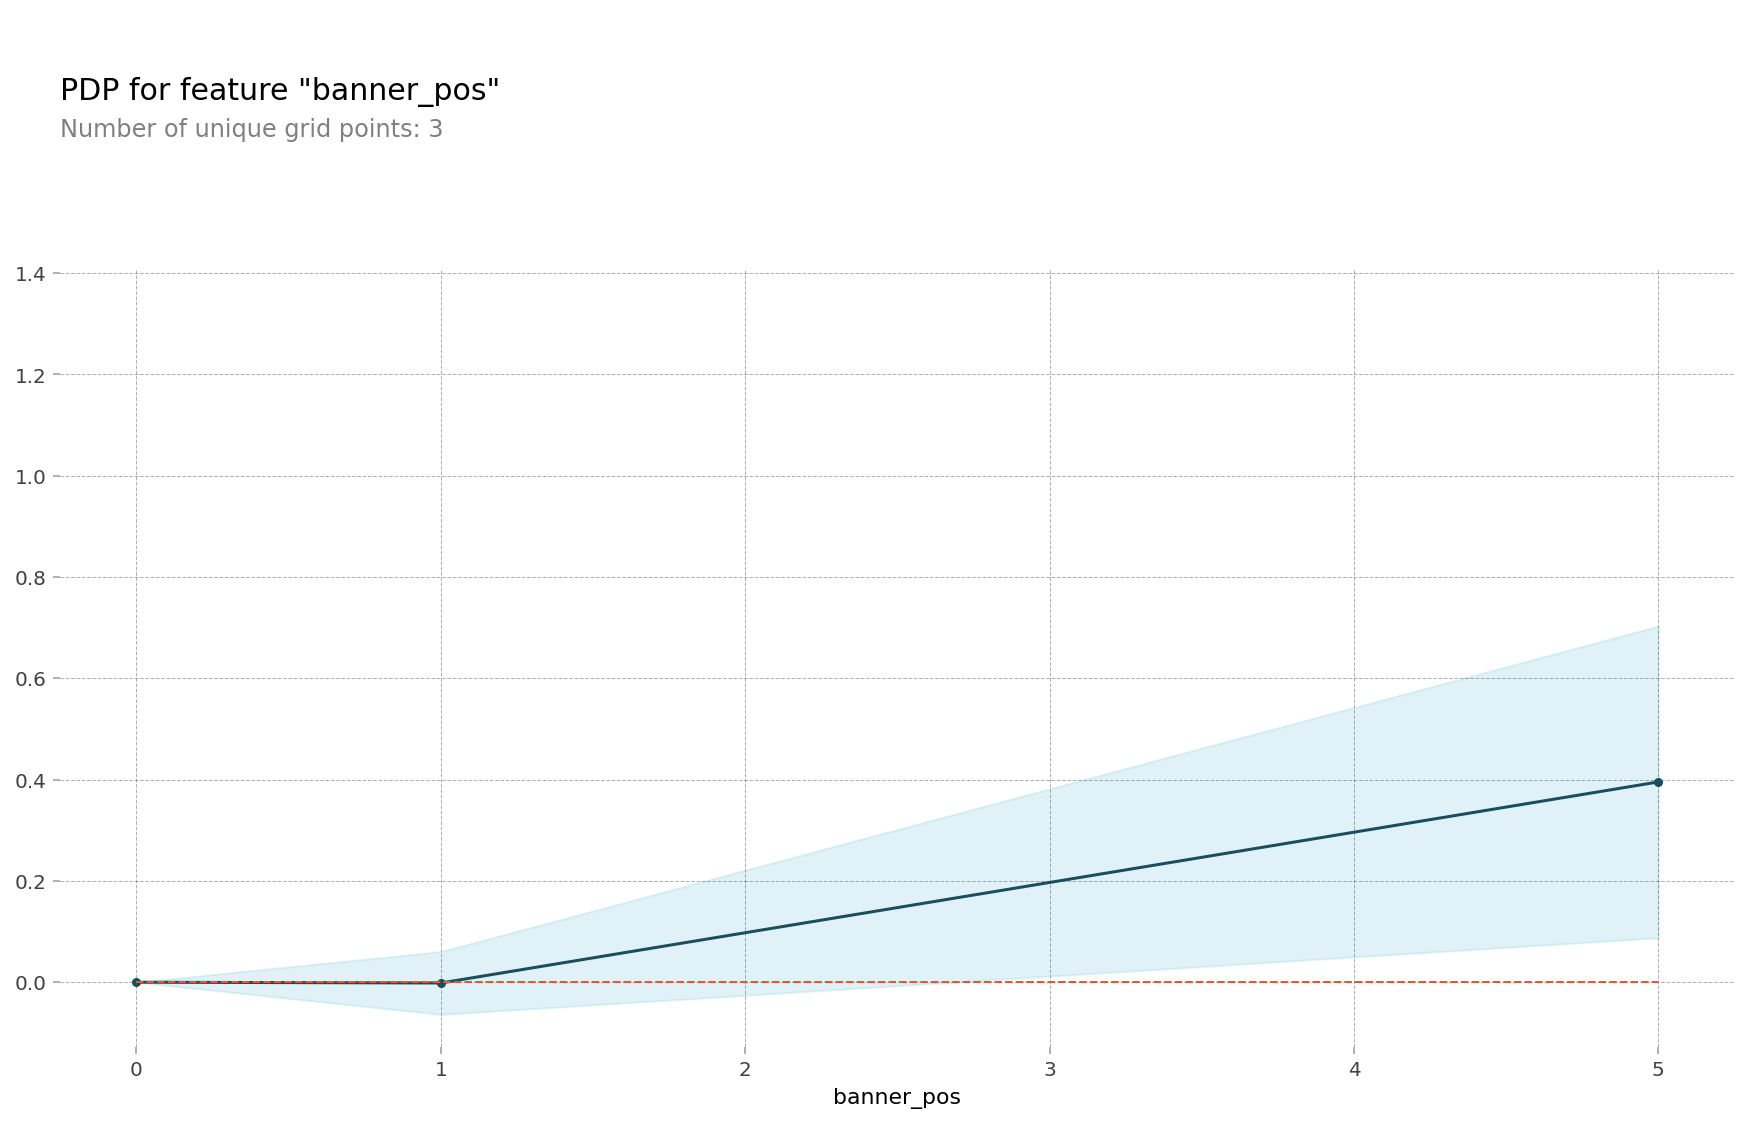

In [29]:
pdp_plot(isolated, feature_name=feature);

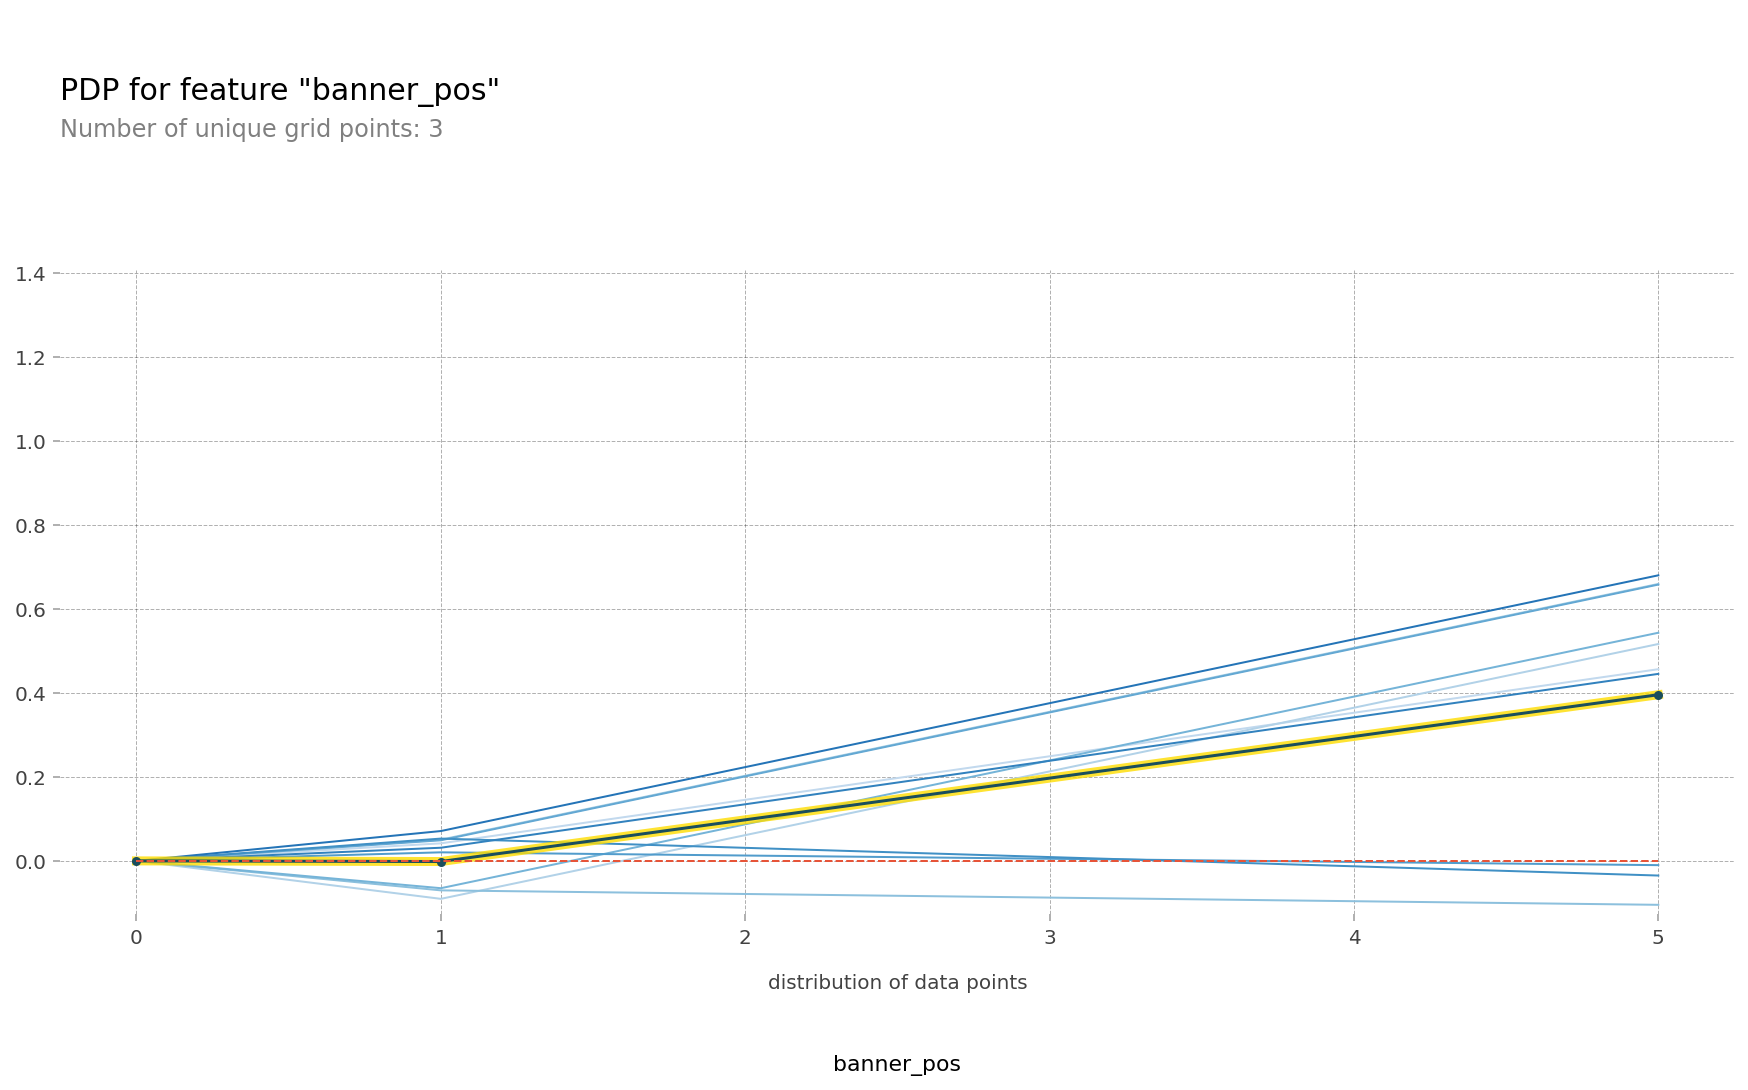

In [30]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

plt.xlim(20000,150000);

In [31]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    # grid point를 크게 주면 겹치는 점이 생겨 Number of unique grid points는 grid point 보다 작을 수 있습니다.
    num_grid_points=100, # grid 포인트를 더 줄 수 있습니다. default = 10
)

In [33]:
print('예측수: ',len(X_val) * 100)

예측수:  1000000


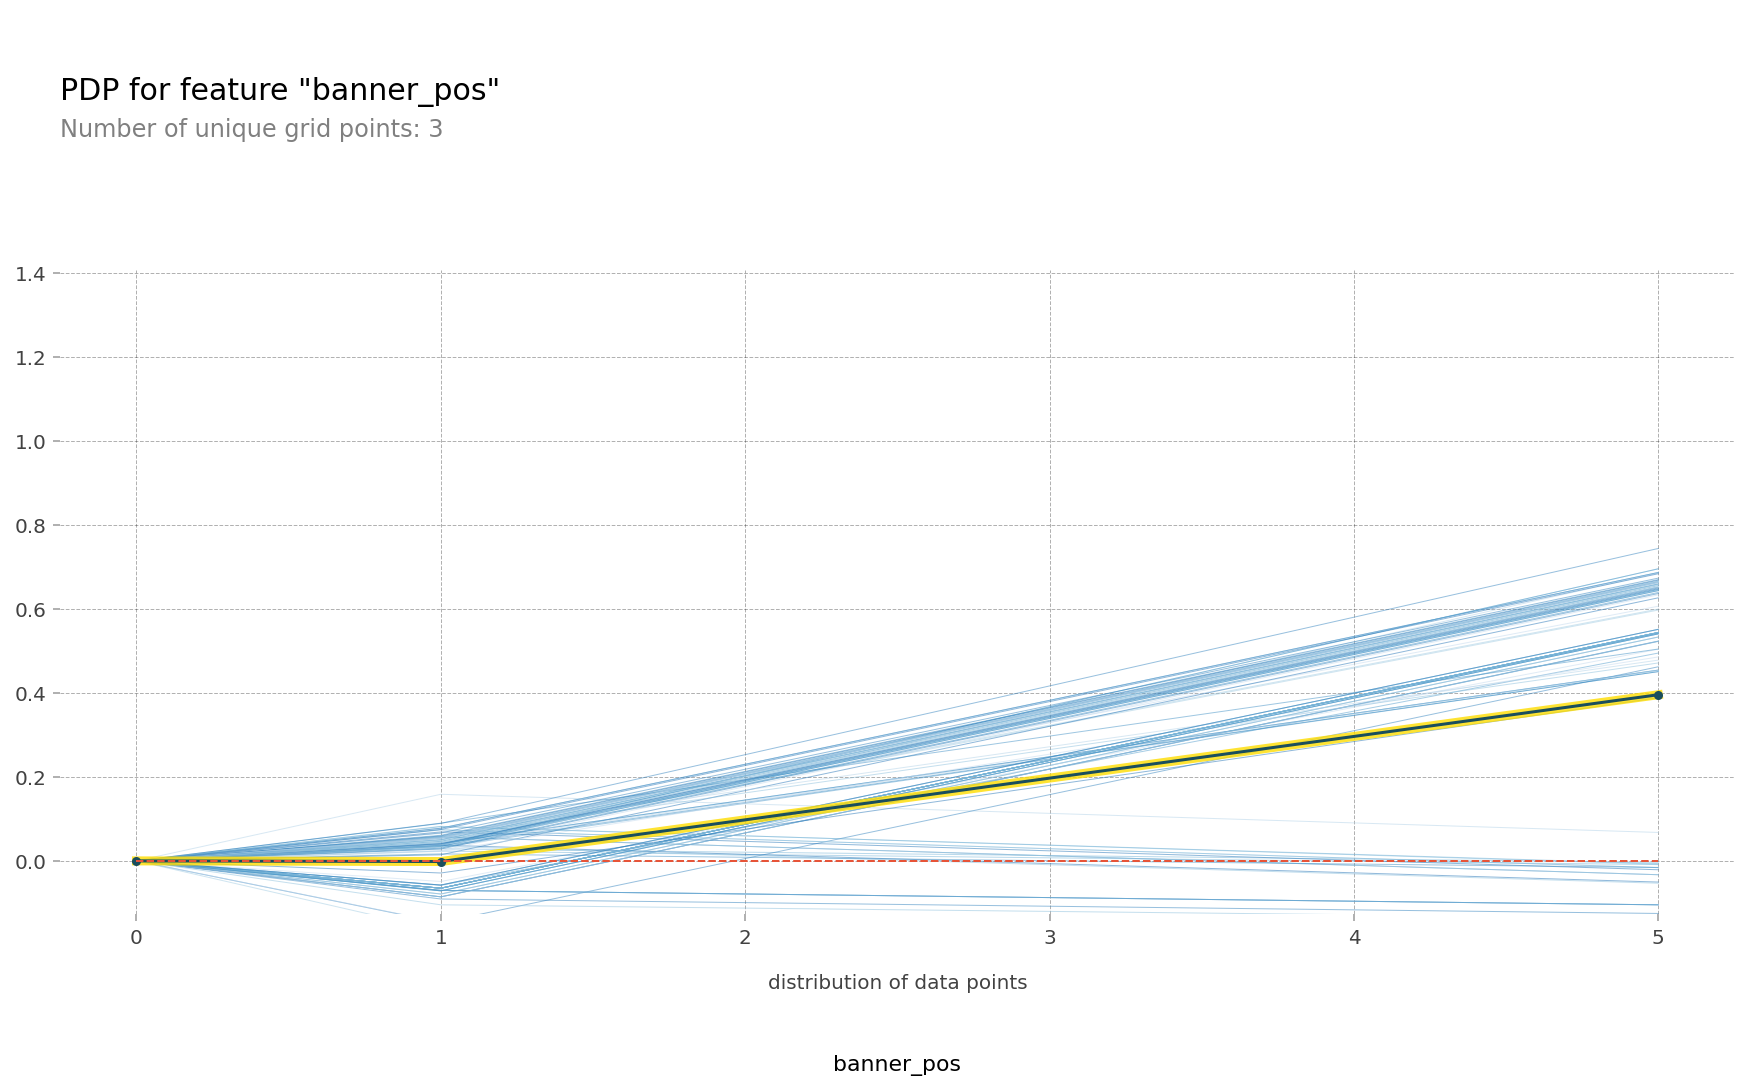

In [32]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True
         , frac_to_plot=0.01 # ICE curves는 100개
         , plot_pts_dist=True )

plt.xlim(20000,150000);

In [33]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_category', 'app_category',
       'device_model', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [44]:
from pdpbox.pdp import pdp_isolate, pdp_plot

#시각화하고자 하는 특성값 넣기
feature = 'device_model'
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

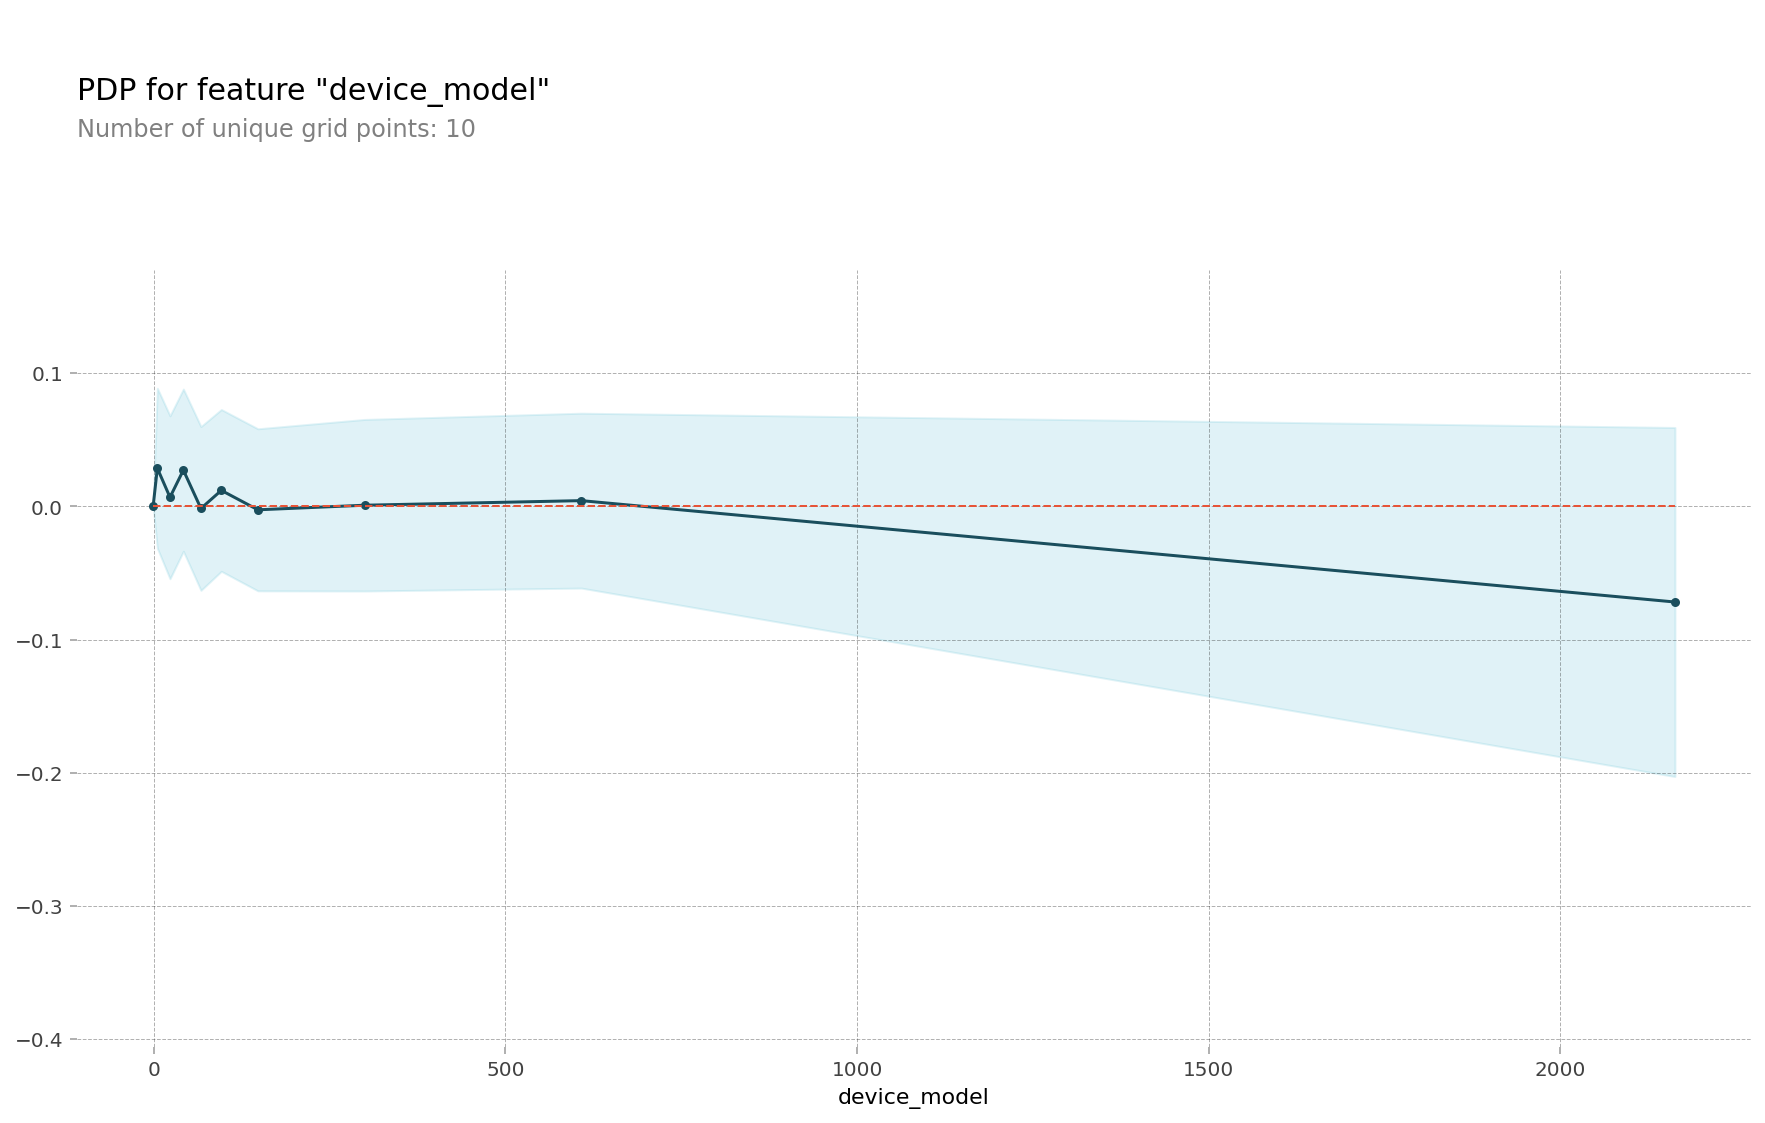

In [45]:
pdp_plot(isolated, feature_name=feature);

In [48]:
!pip install shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491645 sha256=637227f9212862c77ec806dea3692ba8e91c8578c2f4ed8895dd578e160d1095
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [49]:
import shap

In [50]:
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="violin")

NameError: ignored

In [41]:
from pdpbox.pdp import pdp_isolate, pdp_plot

#시각화하고자 하는 특성값 넣기
feature = 'app_category'
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

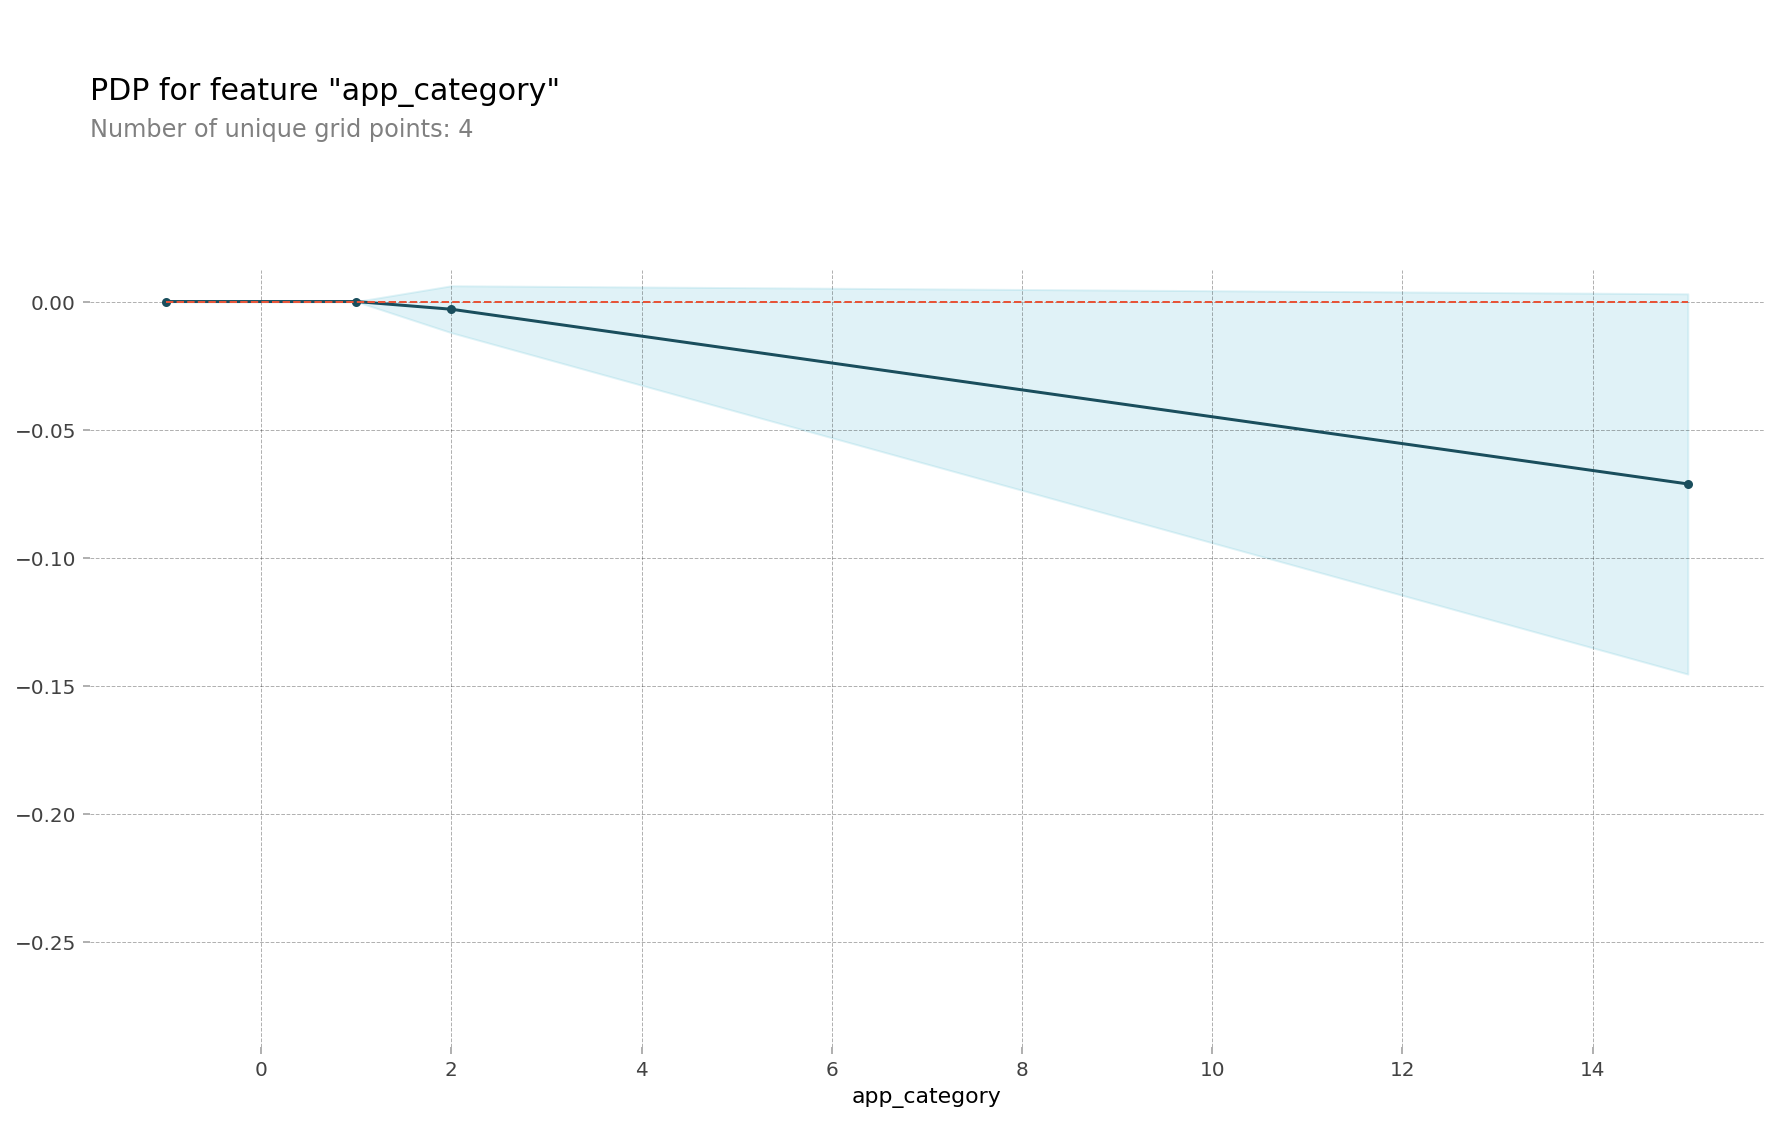

In [42]:
pdp_plot(isolated, feature_name=feature);

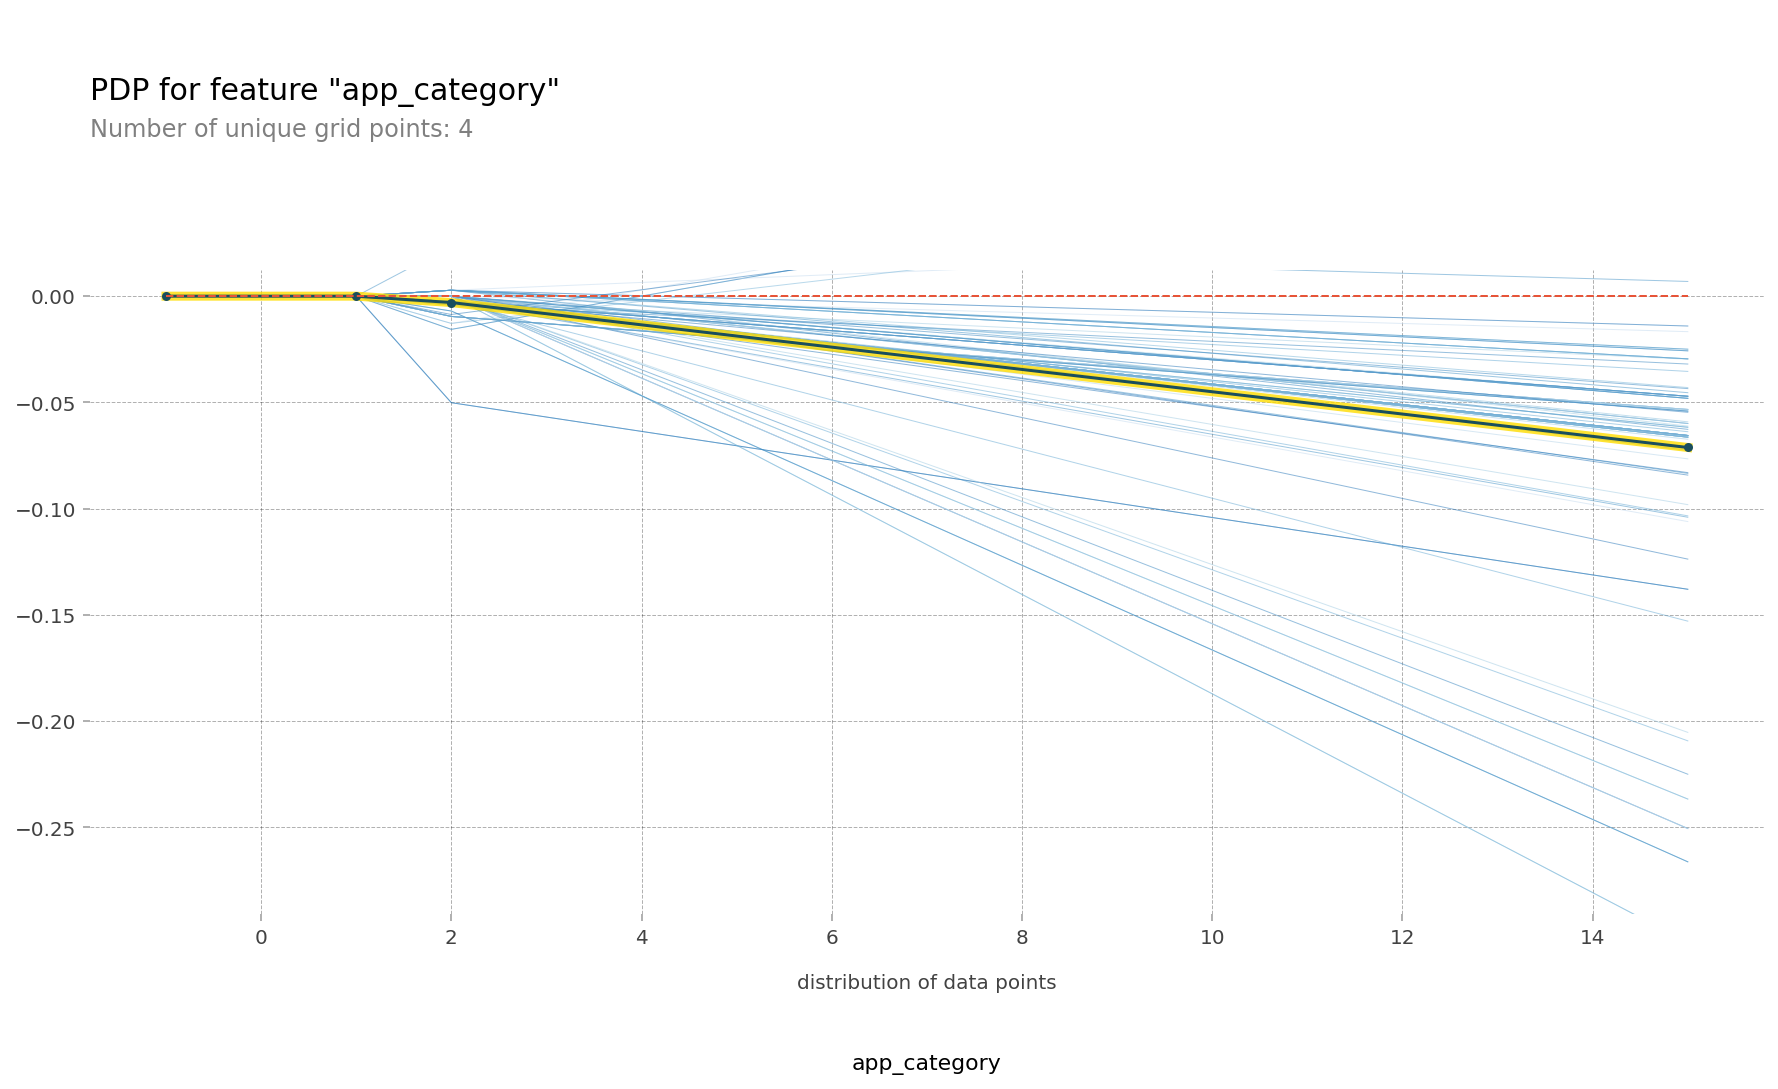

In [43]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True
         , frac_to_plot=0.01 # ICE curves는 100개
         , plot_pts_dist=True )

plt.xlim(20000,150000);

In [36]:
from pdpbox.pdp import pdp_isolate, pdp_plot

#시각화하고자 하는 특성값 넣기
feature = 'site_category'
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

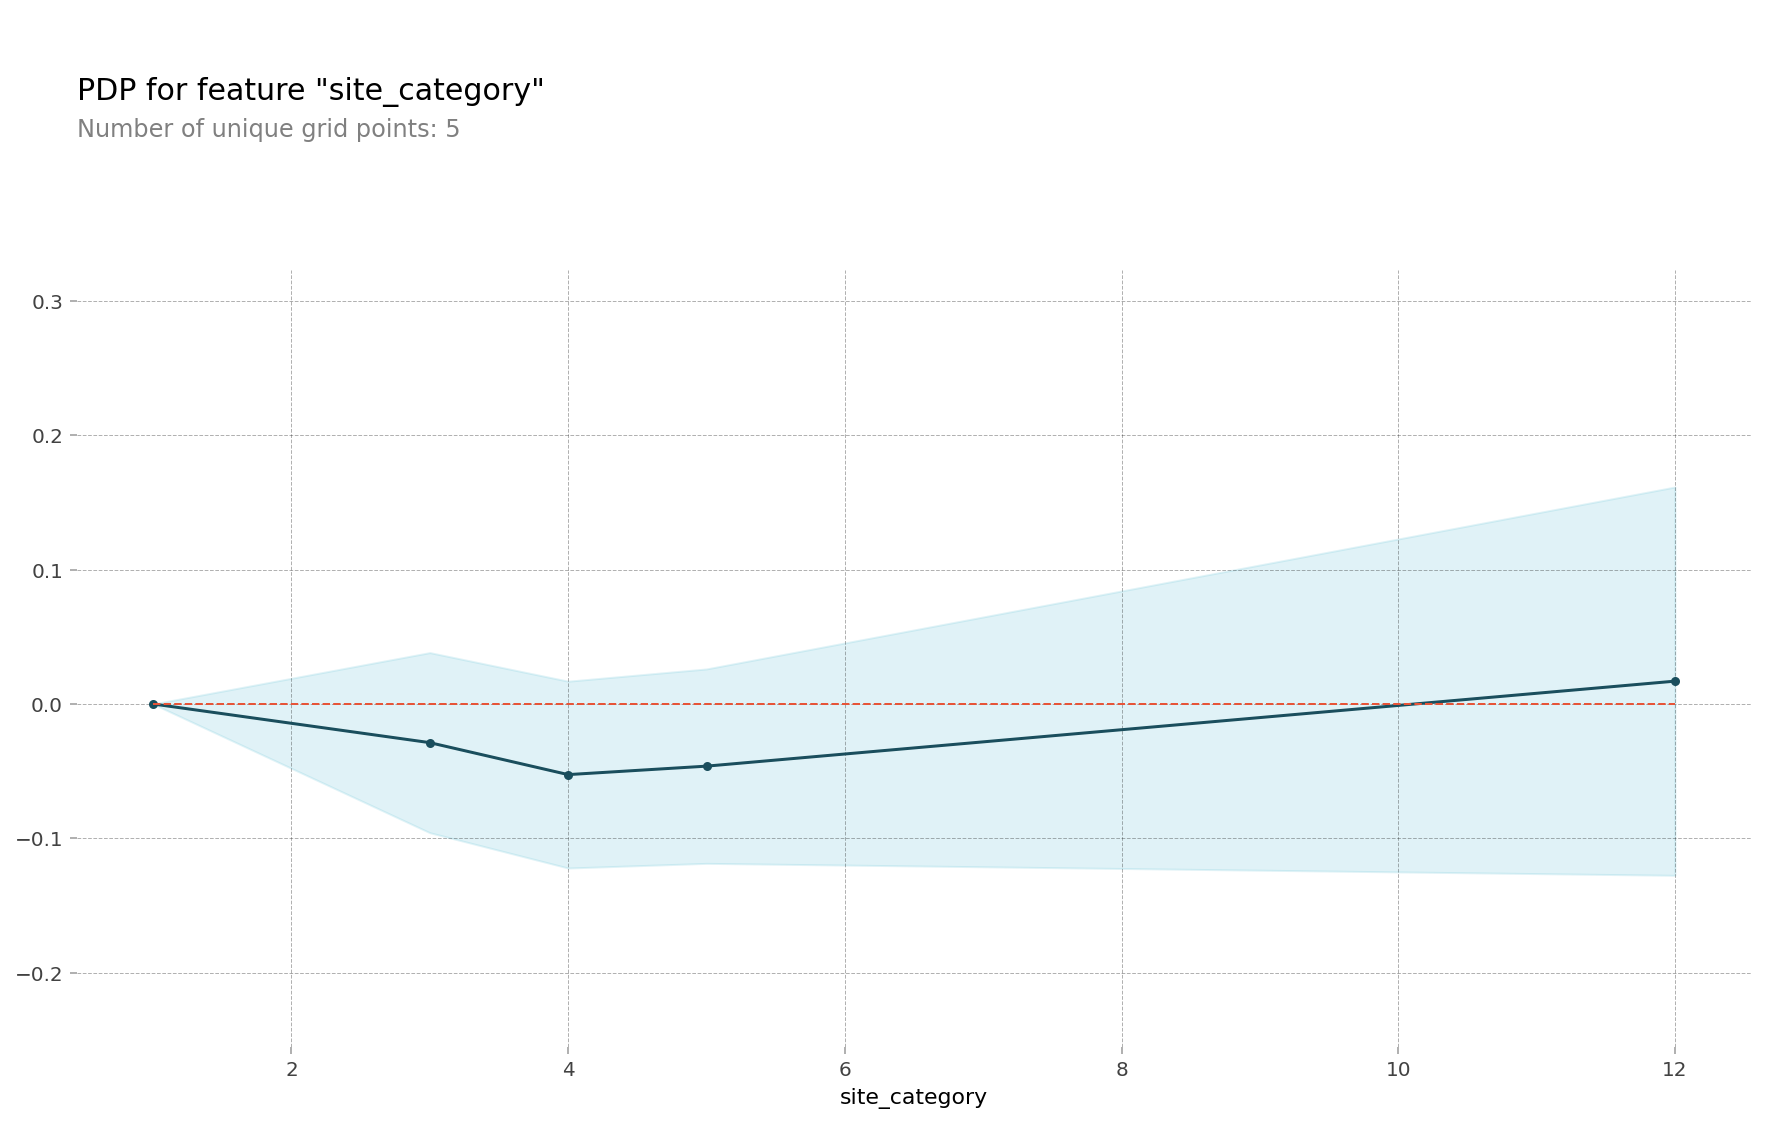

In [37]:
pdp_plot(isolated, feature_name=feature);

In [39]:
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    # grid point를 크게 주면 겹치는 점이 생겨 Number of unique grid points는 grid point 보다 작을 수 있습니다.
    num_grid_points=100, # grid 포인트를 더 줄 수 있습니다. default = 10
)

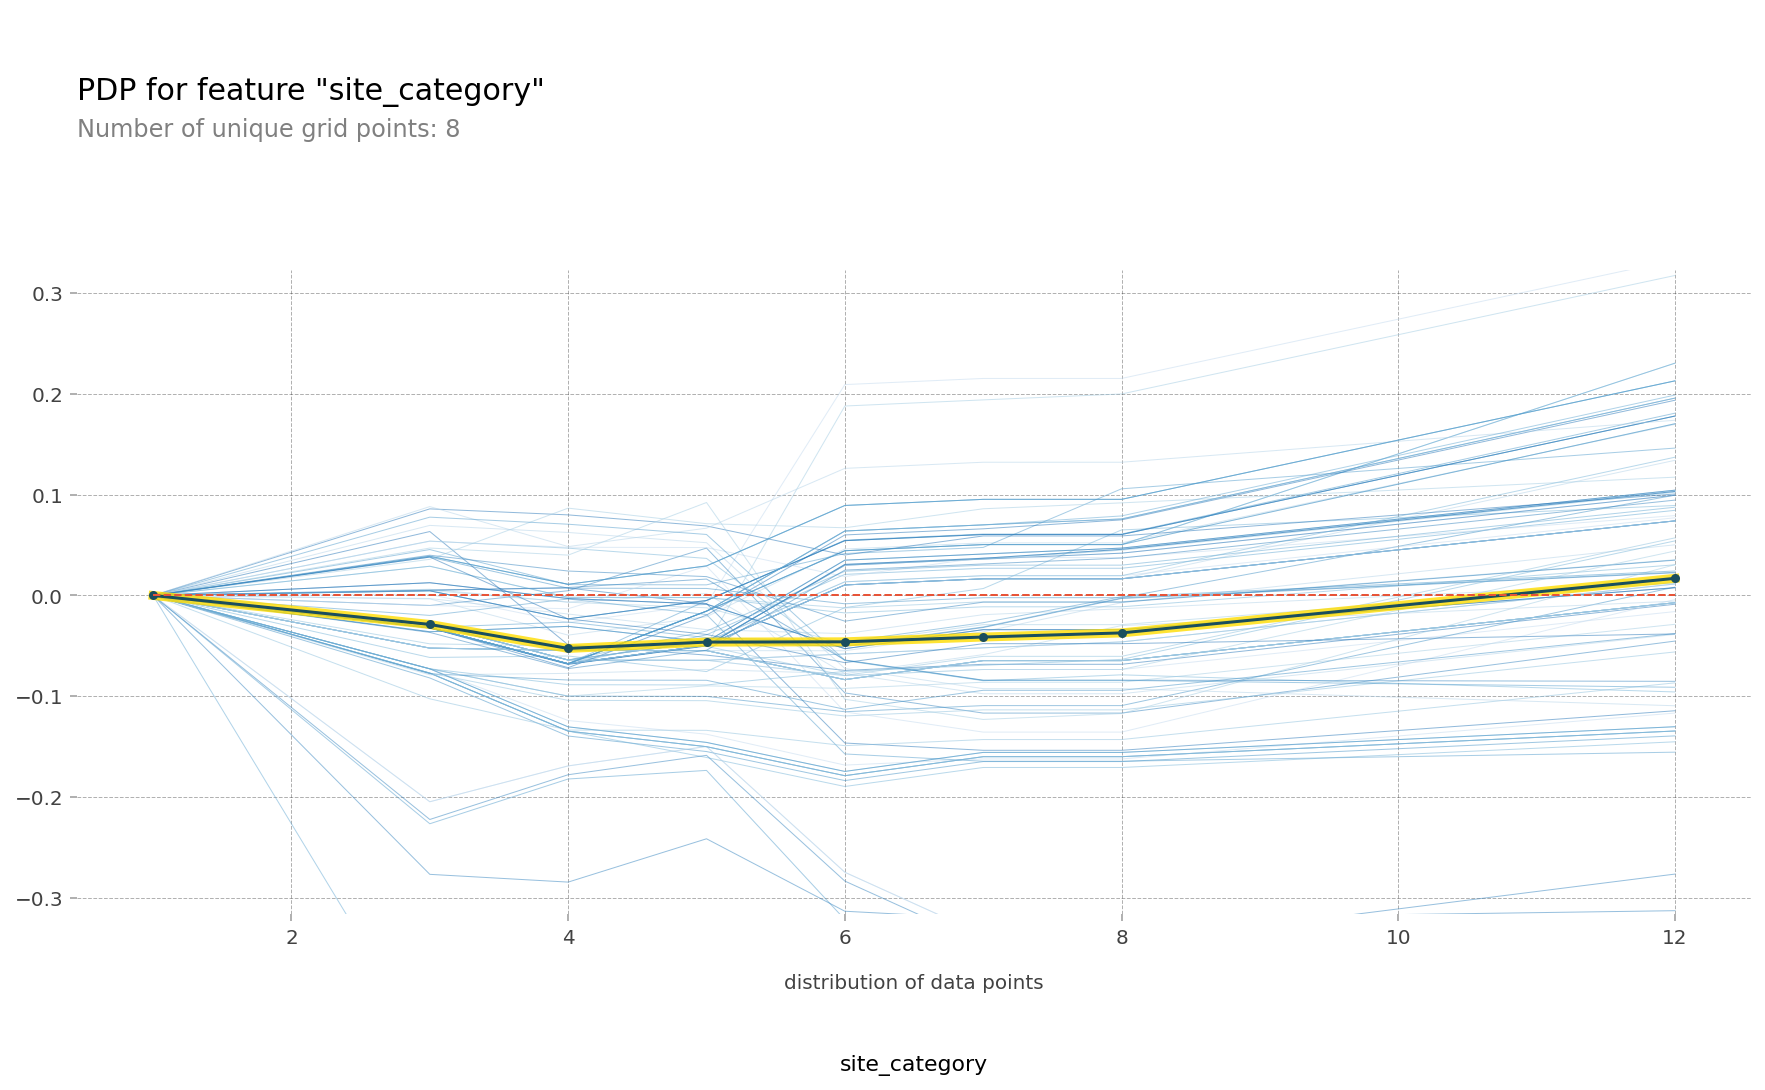

In [40]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True
         , frac_to_plot=0.01 # ICE curves는 100개
         , plot_pts_dist=True )

plt.xlim(20000,150000);

### PDP (2 특성 사용)

이번에는 **두 특성간의 상호작용**을 PDP를 통해 확인해 보겠습니다.

---
(참고: PDPBox version <= 0.20 과 몇몇 matplotlib 버전에서 `pdp_interact_plot`에서`plot_type='contour'` 설정시 에러가 발생할 수 있습니다.
`TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'`
다음 링크를 확인해 주세요 https://github.com/SauceCat/PDPbox/issues/40)

In [35]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [36]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [37]:
features = ['banner_pos', 'device_model']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


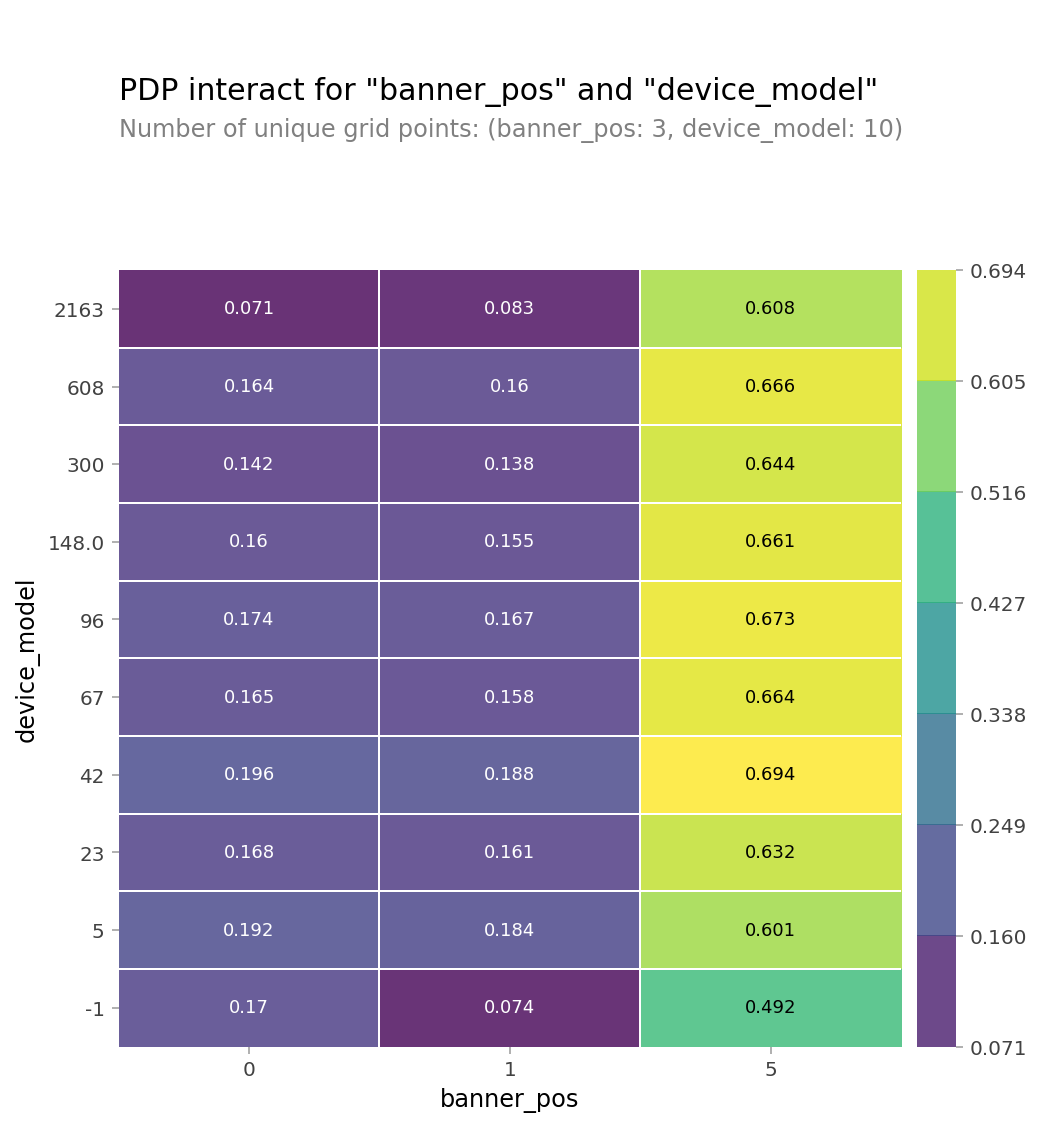

In [38]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [45]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
